In [88]:
import yfinance as yf
from yahoofinancials import YahooFinancials
import plotly.graph_objects as go
import pandas as pd
import glob
import os
import ta
import numpy as np
from ta import add_all_ta_features
from ta.utils import dropna

In [52]:
dxy_df = yf.download("DX-Y.NYB", start = "2009-01-03")
#print(dxy_df)
dxy_df.to_csv("dxy_df.csv")

sp500_df = yf.download("^GSPC", start = "2009-01-03")
#print(sp500_df)
sp500_df.to_csv("sp500_df.csv")

nasdaq_df = yf.download("^IXIC", start = "2009-01-03")
#print(nasdaq_df)
nasdaq_df.to_csv("nasdaq_df.csv")

btc_df = yf.download("BTC-USD", start = "2009-01-03")
#print(btc_df)
btc_df.to_csv("btc_df.csv")

data = pd.concat([sp500_df["Close"],nasdaq_df["Close"],dxy_df["Close"]],axis=1)
data.columns =["spClose", "nsdqClose","dxyClose"]
data


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


spClose     nsdqClose    dxyClose
Date                                             
2009-01-02   931.799988   1632.209961   81.839996
2009-01-05   927.450012   1628.030029   82.639999
2009-01-06   934.700012   1652.380005   82.849998
2009-01-07   906.650024   1599.060059   82.279999
2009-01-08   909.729980   1617.010010   81.540001
...                 ...           ...         ...
2022-05-18  3923.679932  11418.150391  103.809998
2022-05-19  3900.790039  11388.500000  102.720001
2022-05-20  3901.360107  11354.620117  103.150002
2022-05-23  3973.750000  11535.269531  102.080002
2022-05-24          NaN           NaN  101.995003

[3373 rows x 3 columns]

In [53]:
price = pd.read_csv('btc_df.csv')
price.set_index(price.Date,inplace=True)
price = price.drop( "Date", axis = 1)
price.index = pd.to_datetime(price.index)
price

Open          High           Low         Close  \
Date                                                                 
2014-09-17    465.864014    468.174011    452.421997    457.334015   
2014-09-18    456.859985    456.859985    413.104004    424.440002   
2014-09-19    424.102997    427.834991    384.532013    394.795990   
2014-09-20    394.673004    423.295990    389.882996    408.903992   
2014-09-21    408.084991    412.425995    393.181000    398.821014   
...                  ...           ...           ...           ...   
2022-05-20  30311.119141  30664.976562  28793.605469  29200.740234   
2022-05-21  29199.859375  29588.869141  29027.394531  29432.226562   
2022-05-22  29432.472656  30425.861328  29275.183594  30323.722656   
2022-05-23  30309.396484  30590.585938  28975.560547  29098.910156   
2022-05-24  29083.347656  29397.148438  29083.347656  29272.199219   

               Adj Close       Volume  
Date                                   
2014-09-17    457.334015     21056800  
2014-09-18    424.440002     34483200  
2014-09-19    394.795990     37919700  
2014-09-20    408.903992     36863600  
2014-09-21    398.821014     26580100  
...                  ...          ...  
2022-05-20  29200.740234  30749382605  
2022-05-21  29432.226562  17274840442  
2022-05-22  30323.722656  21631532270  
2022-05-23  29098.910156  31483454557  
2022-05-24  29272.199219  30382360576  

[2807 rows x 6 columns]

In [54]:
df = pd.merge(data, price, on = "Date",how = "right")

In [55]:
others = pd.read_csv('Coin_Metrics_Network_Data_2022-05-24T01-33.csv', delimiter=";")
others = others[:4888]
others.rename(columns={"Time":"Date"},inplace=True)
others.set_index(others.Date,inplace=True)
others = others.drop( "Date", axis = 1)
others.index = pd.to_datetime(others.index)
others = others.astype(float)
others.dtypes

FileNotFoundError: [Errno 2] No such file or directory: 'Coin_Metrics_Network_Data_2022-05-24T01-33.csv'

In [57]:


df = pd.merge(df, others, on = "Date",how = "left")

df

spClose     nsdqClose    dxyClose          Open          High  \
Date                                                                            
2014-09-17  2001.569946   4562.189941   84.699997    465.864014    468.174011   
2014-09-18  2011.359985   4593.430176   84.320000    456.859985    456.859985   
2014-09-19  2010.400024   4579.790039   84.800003    424.102997    427.834991   
2014-09-20          NaN           NaN         NaN    394.673004    423.295990   
2014-09-21          NaN           NaN         NaN    408.084991    412.425995   
...                 ...           ...         ...           ...           ...   
2022-05-20  3901.360107  11354.620117  103.150002  30311.119141  30664.976562   
2022-05-21          NaN           NaN         NaN  29199.859375  29588.869141   
2022-05-22          NaN           NaN         NaN  29432.472656  30425.861328   
2022-05-23  3973.750000  11535.269531  102.080002  30309.396484  30590.585938   
2022-05-24          NaN           NaN  101.995003  29083.347656  29397.148438   

                     Low         Close     Adj Close       Volume  \
Date                                                                
2014-09-17    452.421997    457.334015    457.334015     21056800   
2014-09-18    413.104004    424.440002    424.440002     34483200   
2014-09-19    384.532013    394.795990    394.795990     37919700   
2014-09-20    389.882996    408.903992    408.903992     36863600   
2014-09-21    393.181000    398.821014    398.821014     26580100   
...                  ...           ...           ...          ...   
2022-05-20  28793.605469  29200.740234  29200.740234  30749382605   
2022-05-21  29027.394531  29432.226562  29432.226562  17274840442   
2022-05-22  29275.183594  30323.722656  30323.722656  21631532270   
2022-05-23  28975.560547  29098.910156  29098.910156  31483454557   
2022-05-24  29083.347656  29272.199219  29272.199219  30382360576   

            BTC / USD Denominated Closing Price_x  \
Date                                                
2014-09-17                           4.563399e+14   
2014-09-18                           4.268801e+14   
2014-09-19                           3.938939e+14   
2014-09-20                           4.110413e+14   
2014-09-21                           4.004045e+14   
...                                           ...   
2022-05-20                           2.922425e+13   
2022-05-21                           2.942008e+14   
2022-05-22                           3.033188e+12   
2022-05-23                                    NaN   
2022-05-24                                    NaN   

            BTC / Free Float Market Cap (USD)_x  \
Date                                              
2014-09-17                         5.653153e+15   
2014-09-18                         5.288983e+15   
2014-09-19                         4.880889e+15   
2014-09-20                         5.094028e+15   
2014-09-21                         4.962847e+15   
...                                         ...   
2022-05-20                         4.275092e+16   
2022-05-21                         4.303800e+15   
2022-05-22                         4.437191e+15   
2022-05-23                                  NaN   
2022-05-24                                  NaN   

            BTC / Realized Market Cap (USD)_x  \
Date                                            
2014-09-17                       4.714267e+14   
2014-09-18                       4.706379e+15   
2014-09-19                       4.694356e+15   
2014-09-20                       4.685686e+15   
2014-09-21                       4.684308e+15   
...                                       ...   
2022-05-20                       4.536869e+16   
2022-05-21                       4.536042e+16   
2022-05-22                       4.537076e+16   
2022-05-23                                NaN   
2022-05-24                                NaN   

            BTC / Free Float MVRV (Free Float Market Cap / Realized Mark

In [84]:
def pull_data():
    dxy_df = yf.download("DX-Y.NYB", start = "2009-01-03")
    #print(dxy_df)
    dxy_df.to_csv("dxy_df.csv")

    sp500_df = yf.download("^GSPC", start = "2009-01-03")
    #print(sp500_df)
    sp500_df.to_csv("sp500_df.csv")

    nasdaq_df = yf.download("^IXIC", start = "2009-01-03")
    #print(nasdaq_df)
    nasdaq_df.to_csv("nasdaq_df.csv")

    btc_df = yf.download("BTC-USD", start = "2009-01-03")
    #print(btc_df)
    btc_df.to_csv("btc_df.csv")

    data = pd.concat([sp500_df["Close"],nasdaq_df["Close"],dxy_df["Close"]],axis=1)
    data.columns =["spClose", "nsdqClose","dxyClose"]

    price = pd.read_csv('btc_df.csv')
    price.set_index(price.Date,inplace=True)
    price = price.drop( "Date", axis = 1)
    price.index = pd.to_datetime(price.index)

    others = pd.read_excel("Coin_Metrics_Network_Data_2022-05-24T15-38.xlsx")
    
    others.rename(columns={"Time":"Date"},inplace=True)
    others.set_index(others.Date,inplace=True)
    others = others.drop( "Date", axis = 1)
    others.index = pd.to_datetime(others.index)
    others = others.astype(float)
    

    df = pd.merge(data, price, on = "Date",how = "right")

    df = pd.merge(df, others, on = "Date",how = "left")

    df.to_csv("last_df.csv")
    last_data = pd.read_csv("last_df.csv")
    last_data.set_index(last_data.Date,inplace=True)
    last_data = last_data.drop( "Date", axis = 1)
    return last_data

pull_data()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


spClose     nsdqClose    dxyClose          Open          High  \
Date                                                                            
2014-09-17  2001.569946   4562.189941   84.699997    465.864014    468.174011   
2014-09-18  2011.359985   4593.430176   84.320000    456.859985    456.859985   
2014-09-19  2010.400024   4579.790039   84.800003    424.102997    427.834991   
2014-09-20          NaN           NaN         NaN    394.673004    423.295990   
2014-09-21          NaN           NaN         NaN    408.084991    412.425995   
...                 ...           ...         ...           ...           ...   
2022-05-20  3901.360107  11354.620117  103.150002  30311.119141  30664.976562   
2022-05-21          NaN           NaN         NaN  29199.859375  29588.869141   
2022-05-22          NaN           NaN         NaN  29432.472656  30425.861328   
2022-05-23  3973.750000  11535.269531  102.080002  30309.396484  30590.585938   
2022-05-24  3931.060059  11313.842773  101.973999  29083.347656  29397.148438   

                     Low         Close     Adj Close       Volume  \
Date                                                                
2014-09-17    452.421997    457.334015    457.334015     21056800   
2014-09-18    413.104004    424.440002    424.440002     34483200   
2014-09-19    384.532013    394.795990    394.795990     37919700   
2014-09-20    389.882996    408.903992    408.903992     36863600   
2014-09-21    393.181000    398.821014    398.821014     26580100   
...                  ...           ...           ...          ...   
2022-05-20  28793.605469  29200.740234  29200.740234  30749382605   
2022-05-21  29027.394531  29432.226562  29432.226562  17274840442   
2022-05-22  29275.183594  30323.722656  30323.722656  21631532270   
2022-05-23  28975.560547  29098.910156  29098.910156  31483454557   
2022-05-24  29083.347656  29219.316406  29219.316406  30337978368   

            BTC / USD Denominated Closing Price  ...  \
Date                                             ...   
2014-09-17                           456.339891  ...   
2014-09-18                           426.880107  ...   
2014-09-19                           393.893891  ...   
2014-09-20                           411.041343  ...   
2014-09-21                           400.404531  ...   
...                                         ...  ...   
2022-05-20                         29224.245998  ...   
2022-05-21                         29420.078286  ...   
2022-05-22                         30331.875142  ...   
2022-05-23                         29088.251542  ...   
2022-05-24                                  NaN  ...   

            BTC / BTC Denominated Price  BTC / Free Float Market Cap (USD)  \
Date                                                                         
2014-09-17                          1.0                       5.653153e+09   
2014-09-18                          1.0                       5.288983e+09   
2014-09-19                          1.0                       4.880889e+09   
2014-09-20                          1.0                       5.094028e+09   
2014-09-21                          1.0                       4.962847e+09   
...                                 ...                                ...   
2022-05-20                          1.0                       4.275092e+11   
2022-05-21                          1.0                       4.303800e+11   
2022-05-22                          1.0                       4.437191e+11   
2022-05-23                          1.0                       4.255282e+11   
2022-05-24                          NaN                                NaN   

            BTC / Realized Market Cap (USD)  BTC / Daily Inflation Rate  \
Date                                                                      
2014-09-17                     4.714267e+09                    0.035012   
2014-09-18                     4.706379e+09                    0.033683   
2014-09-19          

In [85]:
def applytechnicals(df):


    df.fillna(method="ffill", inplace=True)
    
    
    
    df["Sma21_manuel"]=df.Close.rolling(21).mean()
    df["Sma50_manuel"]=df.Close.rolling(50).mean()
    df["Sma200_manuel"]=df.Close.rolling(200).mean()
    df["Ema21_manuel"]=df.Close.ewm(21).mean()
    df["Ema50_manuel"]=df.Close.ewm(50).mean()
    df["Ema200_manuel"]=df.Close.ewm(200).mean()
    df["rsi14_manuel"] = ta.momentum.rsi(df.Close, window = 14)
    df["rsi40_manuel"] = ta.momentum.rsi(df.Close, window = 40)
    df["rsi200_manuel"] = ta.momentum.rsi(df.Close, window = 200)
    df["macd_manuel"] = ta.trend.macd_diff(df.Close,window_slow=9,window_fast=1,window_sign=5)
    df["macd_dem_manuel"] = ta.trend.macd_signal(df.Close,window_slow=9,window_fast=1,window_sign=5)
    df["macd_dif_manuel"] = ta.trend.macd(df.Close, window_slow=9, window_fast=1)
    df["tsi_manuel"] = ta.momentum.tsi(df.Close, window_slow=9, window_fast=1)
    df["%K_manuel"] = ta.momentum.stoch(df.High, df.Low, df.Close, window = 14, smooth_window=3)
    df["%D_manuel"] = df["%K_manuel"].rolling(3).mean()
    # Calculation of OnBalanceVolume
    """ OBV = []
    OBV.append(0)
    # Loop through dataset(ClosePrice) from the second row to the end of dataset
    for i in range(1, len(df.Close)):
        if df.Close[i] > df.Close[i-1]:
            OBV.append(OBV[-1] + df.Volume[i])
        elif df.Close[i] < df.Close[i-1]:
            OBV.append(OBV[-1] - df.Volume[i])
        else:
            OBV.append(OBV[-1])
    df["OBV"] = OBV
    df["OBV_EMA"] = df["OBV"].ewm(span=20, adjust=False).mean() """

    
    
    df.dropna(inplace = True)
    
    #data[column].ewm(span=period, adjust=False).mean()

In [92]:
def add_ta_features():
    df = pull_data()
    # https://github.com/bukosabino/ta
    df = add_all_ta_features(df, open="Open", high="High", low="Low", close="Close", volume="Volume")
    applytechnicals(df)
    df.dropna(inplace = True)
    return df

In [94]:
df = add_ta_features()
df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\ta\trend.py:769: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\ta\trend.py:774: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\ta\trend.py:938: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._psar_up = pd.Series(index=self._psar.index)
c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\ta\trend.py:939: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._psar_down = pd.Series(index=self._psar.index)


spClose     nsdqClose    dxyClose          Open          High  \
Date                                                                            
2015-04-04  2066.959961   4886.939941   97.440002    254.291000    255.257996   
2015-04-05  2066.959961   4886.939941   97.440002    253.761002    260.674988   
2015-04-06  2080.620117   4917.319824   97.110001    260.721008    261.798004   
2015-04-07  2076.330078   4910.229980   97.830002    255.274002    255.804993   
2015-04-08  2081.899902   4950.819824   98.070000    253.063995    253.847000   
...                 ...           ...         ...           ...           ...   
2022-05-20  3901.360107  11354.620117  103.150002  30311.119141  30664.976562   
2022-05-21  3901.360107  11354.620117  103.150002  29199.859375  29588.869141   
2022-05-22  3901.360107  11354.620117  103.150002  29432.472656  30425.861328   
2022-05-23  3973.750000  11535.269531  102.080002  30309.396484  30590.585938   
2022-05-24  3924.560059  11315.384766  101.964996  29083.347656  29397.148438   

                     Low         Close     Adj Close       Volume  \
Date                                                                
2015-04-04    251.100006    253.697006    253.697006     12493500   
2015-04-05    251.942001    260.597992    260.597992     19649200   
2015-04-06    254.574997    255.492004    255.492004     20034200   
2015-04-07    252.205002    253.179993    253.179993     18467400   
2015-04-08    244.214996    245.022003    245.022003     30086400   
...                  ...           ...           ...          ...   
2022-05-20  28793.605469  29200.740234  29200.740234  30749382605   
2022-05-21  29027.394531  29432.226562  29432.226562  17274840442   
2022-05-22  29275.183594  30323.722656  30323.722656  21631532270   
2022-05-23  28975.560547  29098.910156  29098.910156  31483454557   
2022-05-24  29083.347656  29236.484375  29236.484375  30306836480   

            BTC / USD Denominated Closing Price  ...  Ema200_manuel  \
Date                                             ...                  
2015-04-04                           253.945849  ...     296.312601   
2015-04-05                           261.112136  ...     296.031915   
2015-04-06                           256.367387  ...     295.714223   
2015-04-07                           254.831898  ...     295.381853   
2015-04-08                           245.825210  ...     294.989447   
...                                         ...  ...            ...   
2022-05-20                         29224.245998  ...   41402.420825   
2022-05-21                         29420.078286  ...   41342.867570   
2022-05-22                         30331.875142  ...   41288.045907   
2022-05-23                         29088.251542  ...   41227.403390   
2022-05-24                         29088.251542  ...   41167.747027   

            rsi14_manuel  rsi40_manuel  rsi200_manuel  macd_manuel  \
Date                                                                 
2015-04-04     47.508324     47.901000      45.132844     1.848366   
2015-04-05     52.432292     49.251266      45.493022     4.642014   
2015-04-06     48.785829     48.301290      45.272028    -0.581227   
2015-04-07     47.185618     47.872458      45.172167    -1.838087   
2015-04-08     41.956153     46.382179      44.821560    -5.503728   
...                  ...           ...            ...          ...   
2022-05-20     35.393691     39.269961      47.211234     5.660878   
2022-05-21     36.380962     39.609564      47.266921   267.446145   
2022-05-22     40.172711     40.914647      47.481356   741.240420   
2022-05-23     36.917221     39.705535      47.216243  -184.183245   
2022-05-24     37.529588     39.910110      47.249492    61.142600   

            macd_dem_manuel  macd_dif_manuel  tsi_manuel  %K_manuel  %D_manuel  
Date                                                                            
2015-04-04         0.182302         2.030668   14.103251  42.131352

In [95]:
df.describe()

spClose     nsdqClose     dxyClose          Open          High  \
count  2608.000000   2608.000000  2608.000000   2608.000000   2608.000000   
mean   2934.016070   8427.948111    95.775669  13152.338755  13497.016030   
std     793.617154   3333.241271     3.086675  16910.659338  17349.486471   
min    1829.079956   4266.839844    88.589996    210.067993    223.832993   
25%    2271.617493   5554.732544    93.550003    919.447983    924.874008   
50%    2767.129883   7502.379883    96.040001   7013.080078   7217.690674   
75%    3337.750000  10849.155273    97.709999  11746.948730  11966.819824   
max    4796.560059  16057.440430   104.849998  67549.734375  68789.625000   

                Low         Close     Adj Close        Volume  \
count   2608.000000   2608.000000   2608.000000  2.608000e+03   
mean   12769.954323  13161.714666  13161.714666  1.636018e+10   
std    16403.980616  16907.847050  16907.847050  2.023085e+10   
min      199.567001    210.494995    210.494995  1.060090e+07   
25%      901.932999    920.224014    920.224014  1.631900e+08   
50%     6808.793945   7004.114990   7004.114990  7.214148e+09   
75%    11436.250977  11755.105225  11755.105225  2.744744e+10   
max    66382.062500  67566.828125  67566.828125  3.509679e+11   

       BTC / USD Denominated Closing Price  ...  Ema200_manuel  rsi14_manuel  \
count                          2608.000000  ...    2608.000000   2608.000000   
mean                          13148.970471  ...   10029.567690     54.097942   
std                           16911.384639  ...   12799.872385     14.225415   
min                             211.955918  ...     260.107759      9.920239   
25%                             918.503675  ...     607.575286     43.866418   
50%                            6972.815015  ...    6743.932543     53.315641   
75%                           11728.886390  ...    8595.804120     63.566872   
max                           67541.755508  ...   43201.723447     94.302215   

       rsi40_manuel  rsi200_manuel  macd_manuel  macd_dem_manuel  \
count   2608.000000    2608.000000  2608.000000      2608.000000   
mean      53.709235      53.296676    -0.470623        45.775251   
std        9.290732       4.997050   519.150096       914.580885   
min       25.177680      43.728764 -4531.926111     -6154.315705   
25%       46.937612      49.680849   -53.751984       -78.449520   
50%       52.645705      52.486417     0.536816         4.085016   
75%       59.568445      56.271080    64.071564       166.061304   
max       85.440825      74.597781  3535.949512      4991.125238   

       macd_dif_manuel   tsi_manuel    %K_manuel    %D_manuel  
count      2608.000000  2608.000000  2608.000000  2608.000000  
mean         45.304628     9.035587    56.353045    56.350723  
std        1114.031538    42.329372    29.936632    28.164994  
min       -8885.962077   -93.211073     0.000000     2.714005  
25%         -89.834327   -22.610415    30.638408    31.395825  
50%           4.904916     7.562389    58.095099    58.413475  
75%         188.754963    41.505557    84.890573    83.156615  
max        7457.831168    99.394244   100.000000    99.198900  

[8 rows x 123 columns]

In [96]:
df.corr()

spClose  nsdqClose  dxyClose      Open      High       Low  \
spClose          1.000000   0.989099 -0.283678  0.917047  0.916292  0.918230   
nsdqClose        0.989099   1.000000 -0.331016  0.918194  0.917966  0.919179   
dxyClose        -0.283678  -0.331016  1.000000 -0.337386 -0.341603 -0.332744   
Open             0.917047   0.918194 -0.337386  1.000000  0.999512  0.999092   
High             0.916292   0.917966 -0.341603  0.999512  1.000000  0.999017   
...                   ...        ...       ...       ...       ...       ...   
macd_dem_manuel  0.011584   0.047337 -0.134826  0.085514  0.089441  0.096174   
macd_dif_manuel  0.007473   0.037897 -0.109445  0.049014  0.061150  0.070313   
tsi_manuel      -0.092352  -0.068094 -0.006663 -0.066922 -0.059713 -0.055691   
%K_manuel       -0.070469  -0.046349 -0.042219 -0.042376 -0.036770 -0.033567   
%D_manuel       -0.072571  -0.047528 -0.045459 -0.034694 -0.032550 -0.030283   

                    Close  Adj Close    Volume  \
spClose          0.917058   0.917058  0.716353   
nsdqClose        0.918747   0.918747  0.755434   
dxyClose        -0.339126  -0.339126 -0.279695   
Open             0.998784   0.998784  0.711317   
High             0.999467   0.999467  0.715384   
...                   ...        ...       ...   
macd_dem_manuel  0.098446   0.098446  0.073311   
macd_dif_manuel  0.078720   0.078720  0.023824   
tsi_manuel      -0.050577  -0.050577 -0.030192   
%K_manuel       -0.028613  -0.028613 -0.005318   
%D_manuel       -0.028794  -0.028794  0.003611   

                 BTC / USD Denominated Closing Price  ...  Ema200_manuel  \
spClose                                     0.917133  ...       0.931253   
nsdqClose                                   0.918888  ...       0.901470   
dxyClose                                   -0.338627  ...      -0.156580   
Open                                        0.998834  ...       0.914349   
High                                        0.999496  ...       0.912551   
...                                              ...  ...            ...   
macd_dem_manuel                             0.097992  ...      -0.090058   
macd_dif_manuel                             0.077924  ...      -0.076872   
tsi_manuel                                 -0.050612  ...      -0.148597   
%K_manuel                                  -0.028673  ...      -0.132976   
%D_manuel                                  -0.028716  ...      -0.140428   

                 rsi14_manuel  rsi40_manuel  rsi200_manuel  macd_manuel  \
spClose             -0.110324     -0.111509       0.017038    -0.004371   
nsdqClose           -0.077992     -0.070920       0.047352    -0.002072   
dxyClose            -0.013105     -0.042216      -0.219609     0.002666   
Open                -0.066781     -0.028533       0.145868    -0.045471   
High                -0.061656     -0.023933       0.151185    -0.026347   
...                       ...           ...            ...          ...   
macd_dem_manuel      0.553522      0.462361       0.325386     0.142260   
macd_dif_manuel      0.515027      0.400341       0.272106     0.582801   
tsi_manuel           0.874348      0.644255       0.362629     0.322141   
%K_manuel            0.811956      0.599821       0.369563     0.233707   
%D_manuel            0.819688      0.631658       0.396423     0.059141   

                 macd_dem_manuel  macd_dif_manuel  tsi_manuel  %K_manuel  \
spClose                 0.011584         0.007473   -0.092352  -0.070469   
nsdqClose               0.047337         0.037897   -0.068094  -0.046349   
dxyClose               -0.134826        -0.109445   -0.006663  -0.042219   
Open                    0.085514         0.049014   -0.066922  -0.042376   
High                    0.089441         0.061150   -0.059713  -0.036770   
...                          ...              ...         ...        ...   
macd_dem_manuel         1.000000         0.887260    0.534069   0.525297   
macd_dif_manuel         0.887260  

In [103]:
corr = df.corr().Close
corr[np.argsort(corr, axis=0)[:-1]]

BTC / Exchange Withdrawals (USD)       0.811925
BTC / Realized Market Cap (USD)        0.938104
dxyClose                              -0.339126
trend_adx                             -0.026964
volume_mfi                            -0.073292
                                         ...   
BTC / BTC Denominated Price                 NaN
BTC / Total Fees (USD)                 0.424895
BTC / USD Denominated Closing Price    0.999984
others_dlr                            -0.003241
Close                                  1.000000
Name: Close, Length: 122, dtype: float64

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


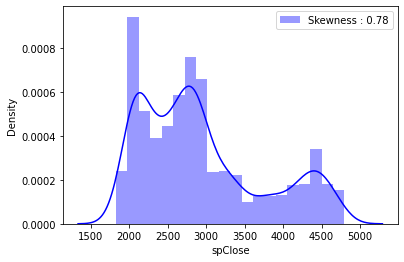

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


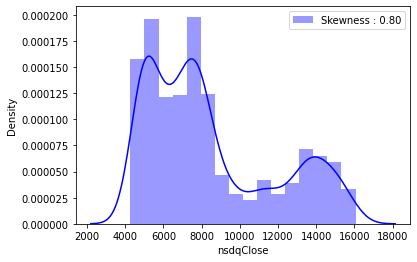

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


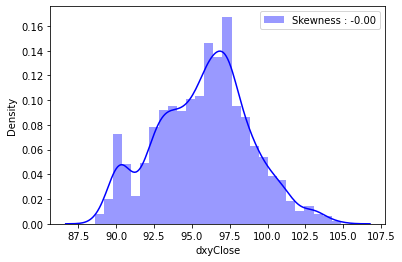

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


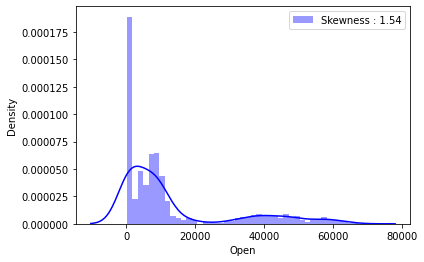

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


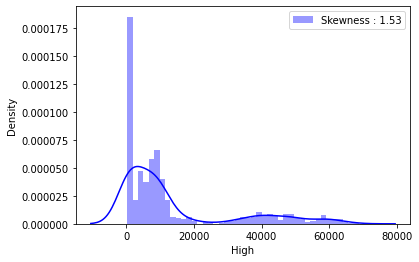

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


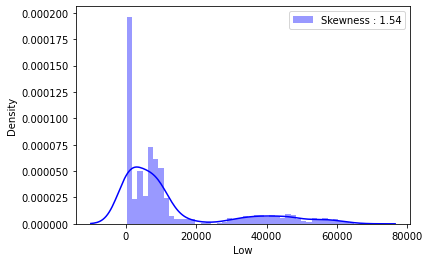

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


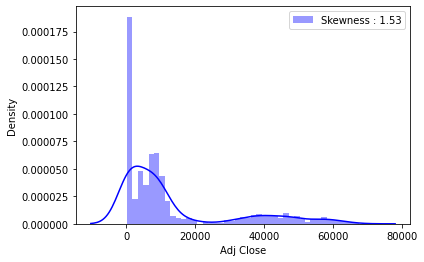

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


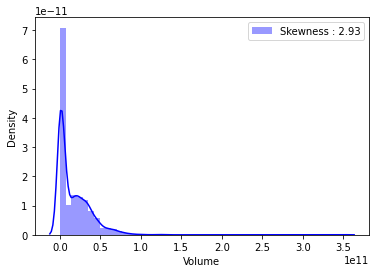

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


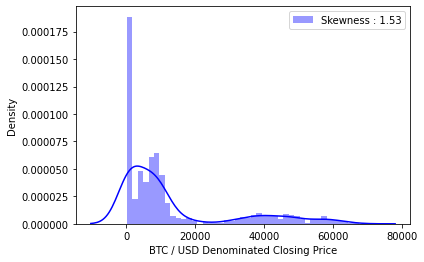

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


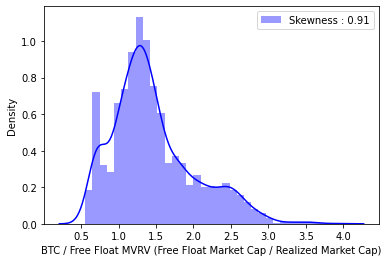

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


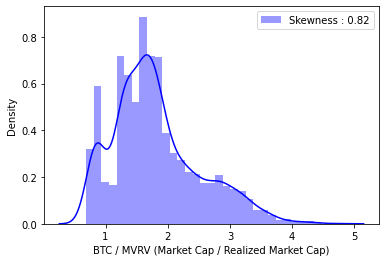

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


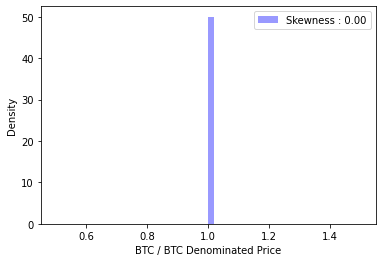

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


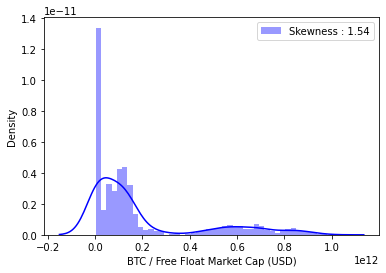

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


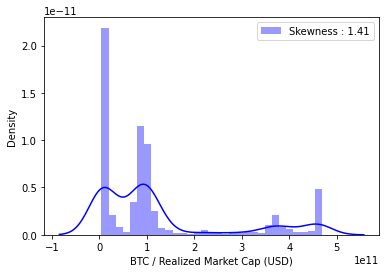

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


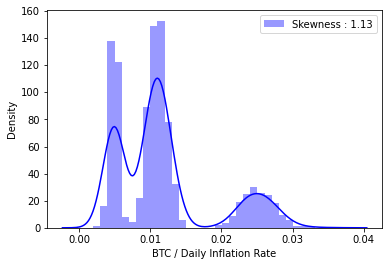

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


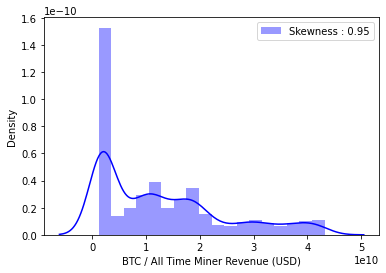

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


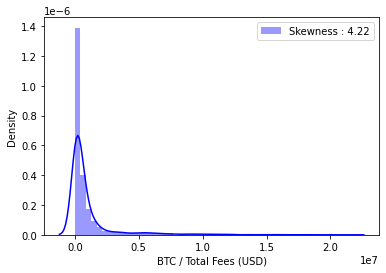

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


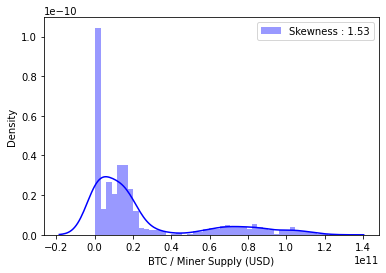

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


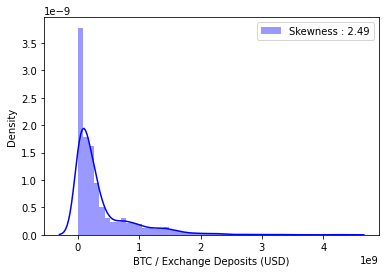

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


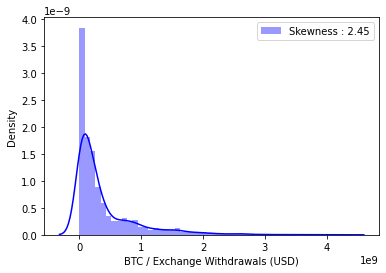

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


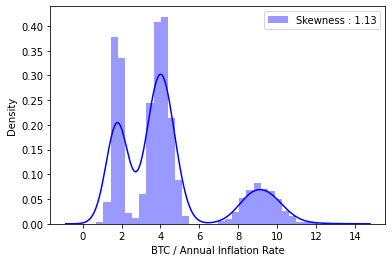

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


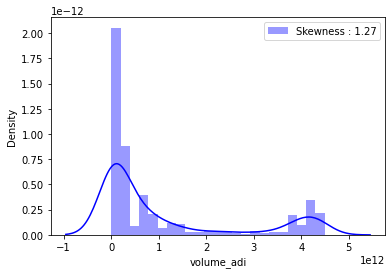

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


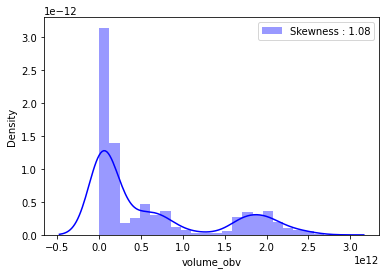

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


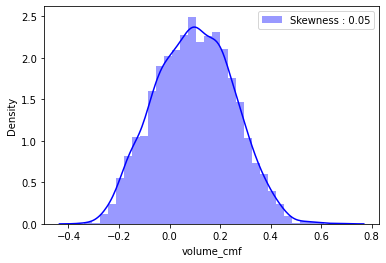

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


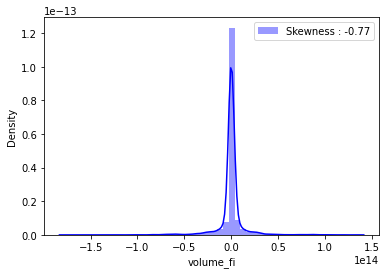

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


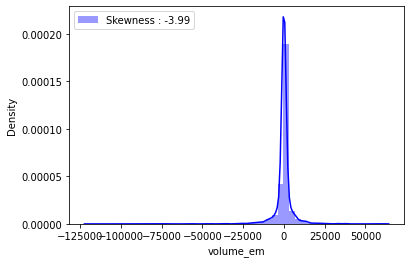

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


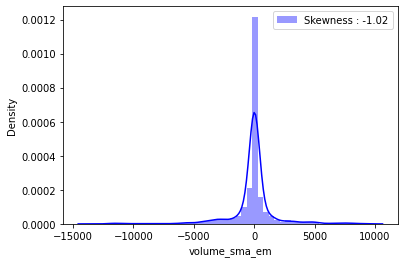

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


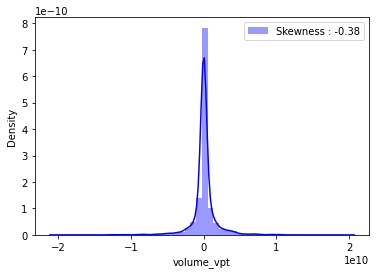

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


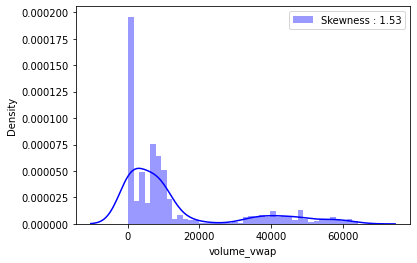

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


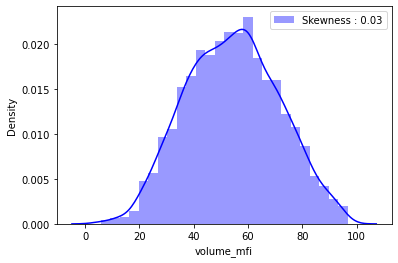

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


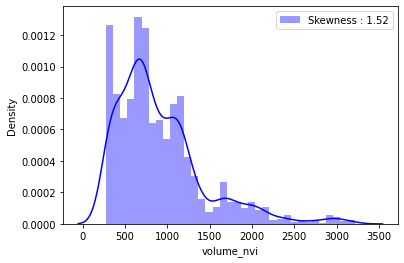

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


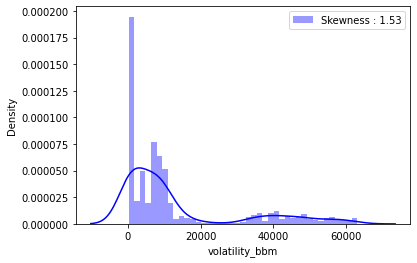

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


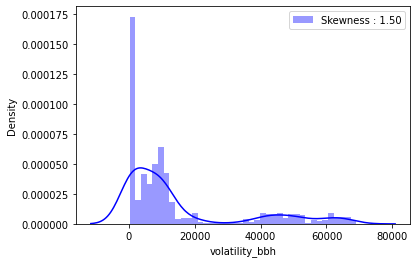

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


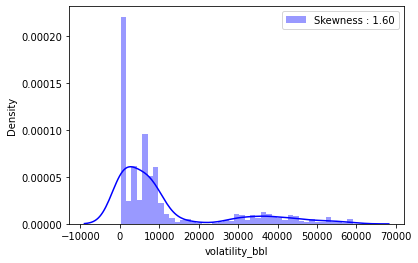

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


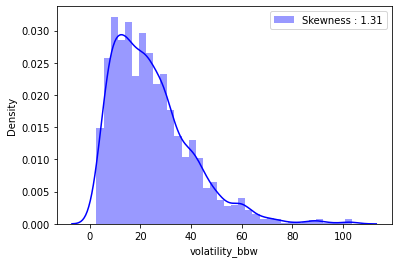

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


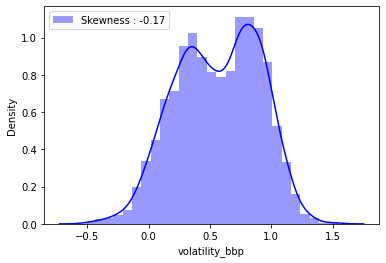

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


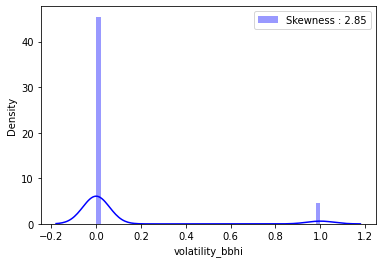

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


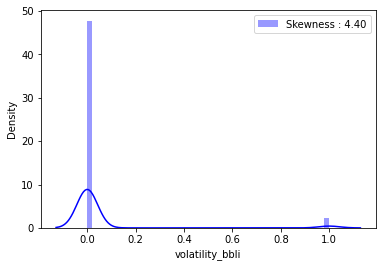

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


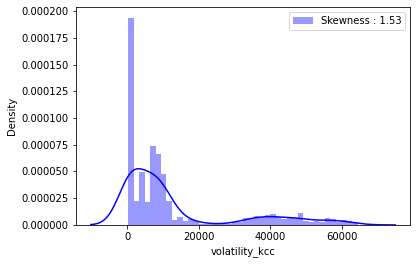

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


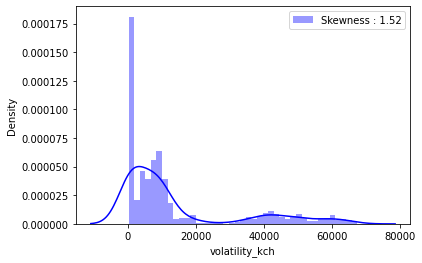

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


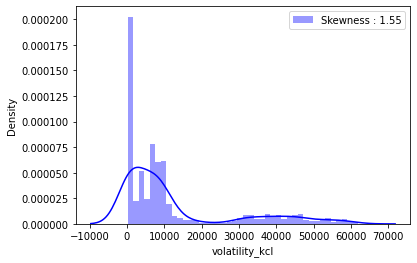

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


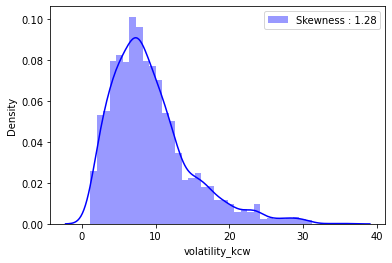

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


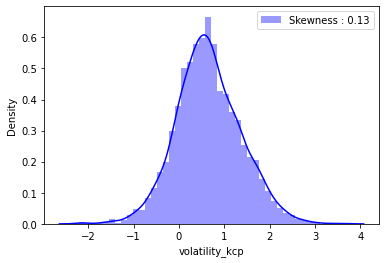

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


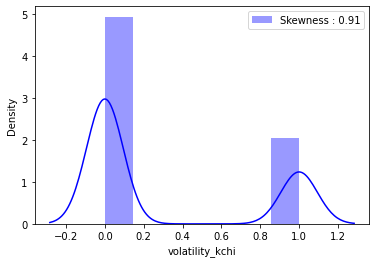

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


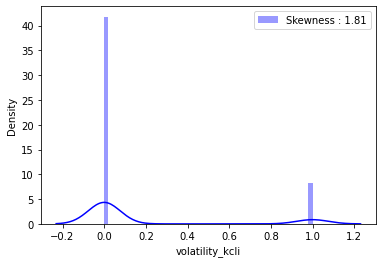

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


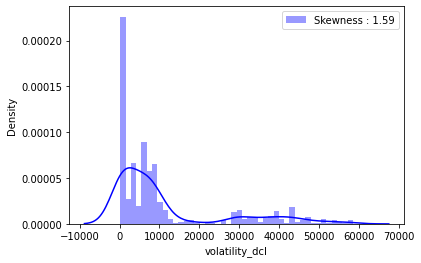

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


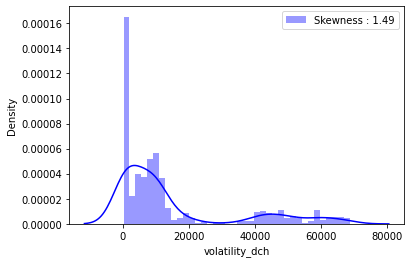

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


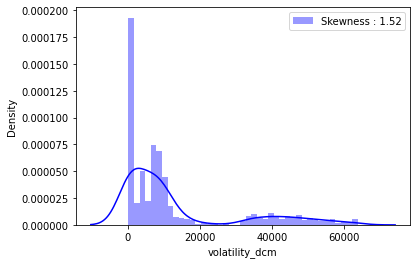

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


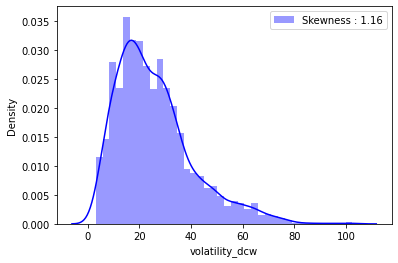

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


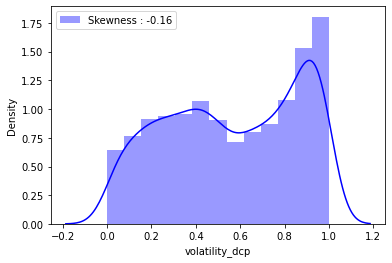

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


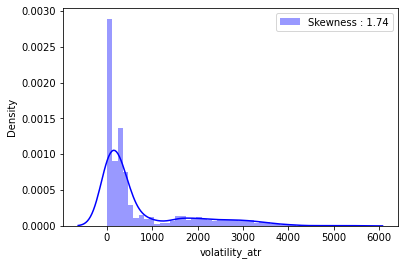

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


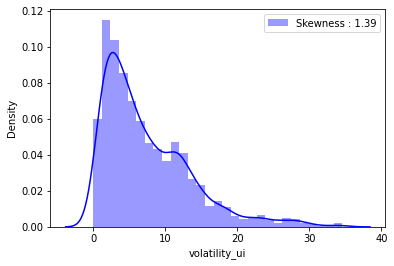

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


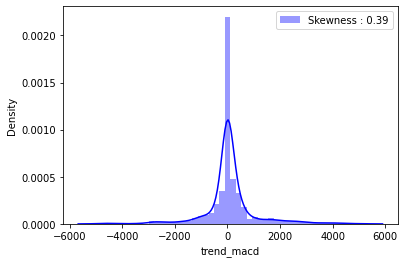

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


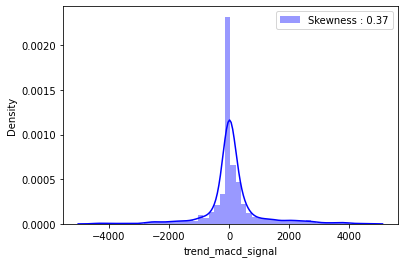

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


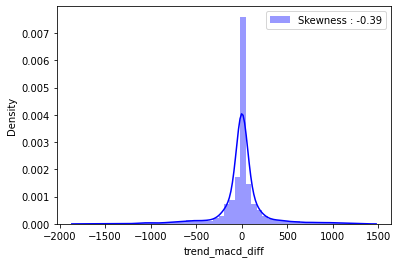

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


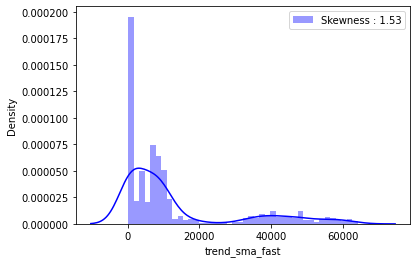

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


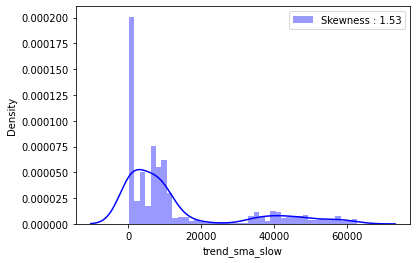

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


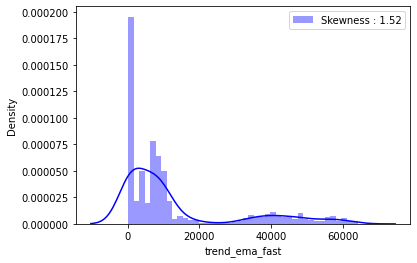

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


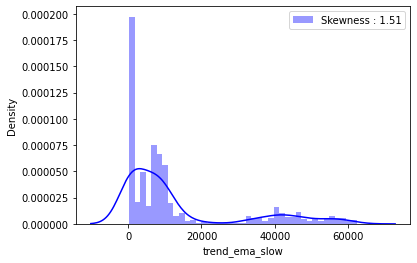

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


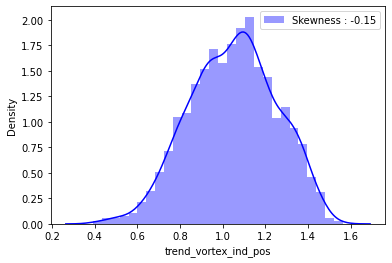

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


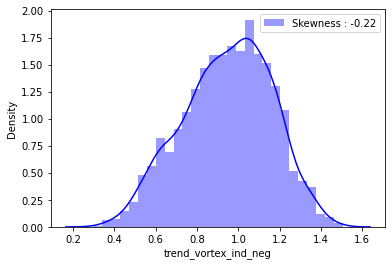

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


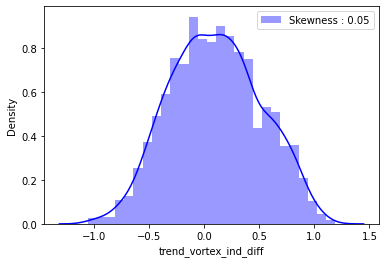

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


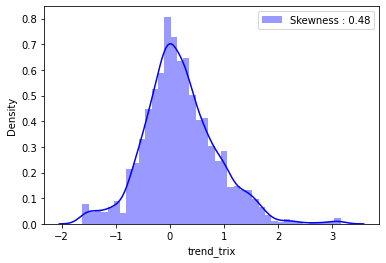

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


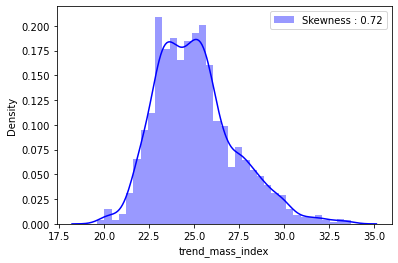

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


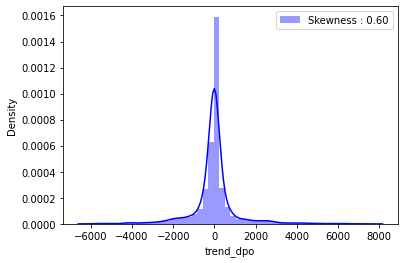

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


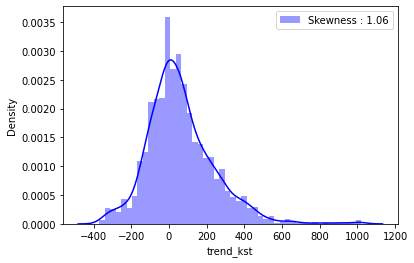

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


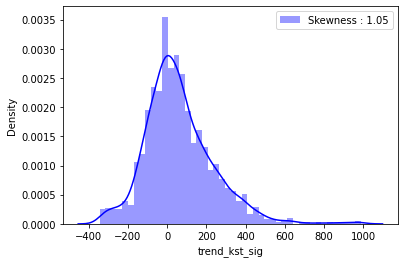

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


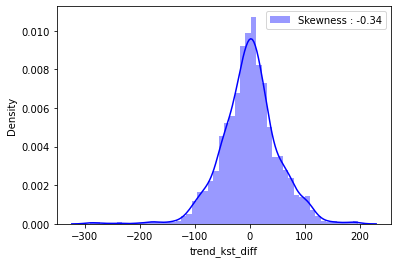

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


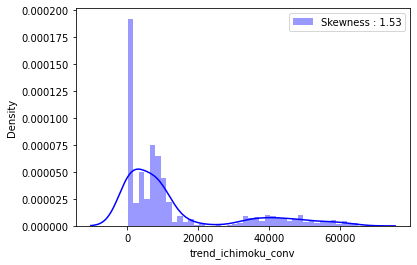

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


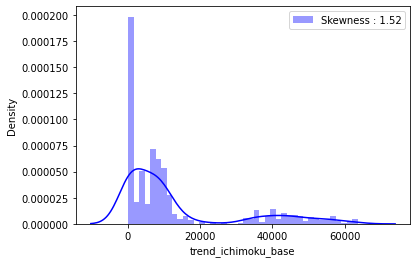

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


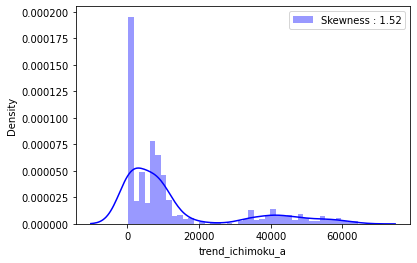

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


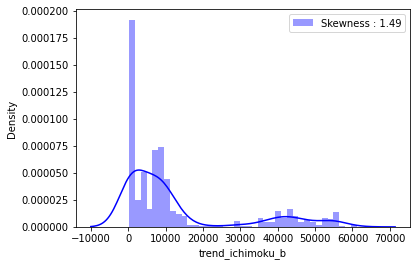

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


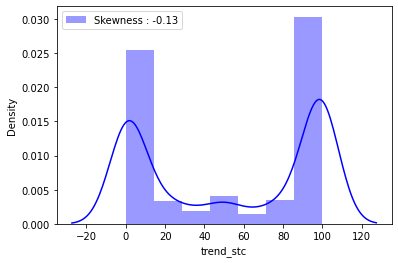

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


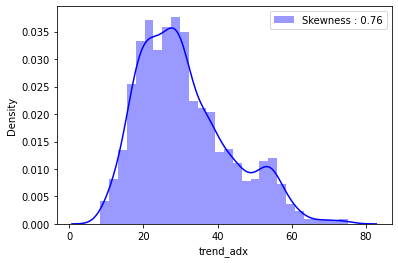

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


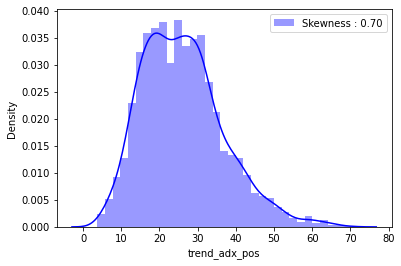

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


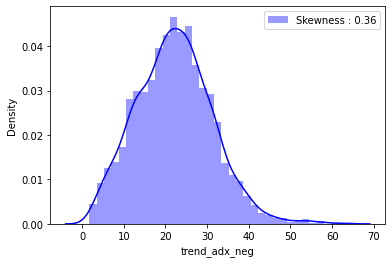

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


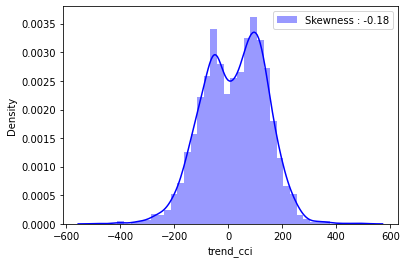

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


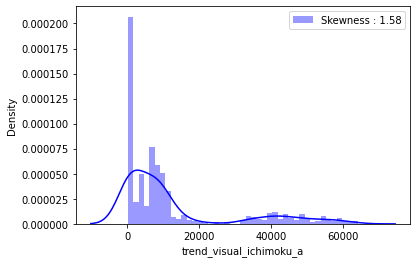

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


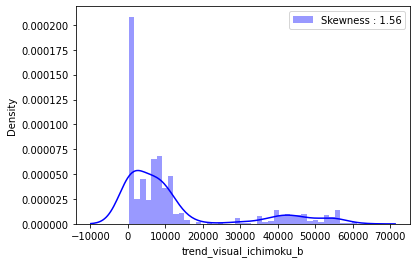

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


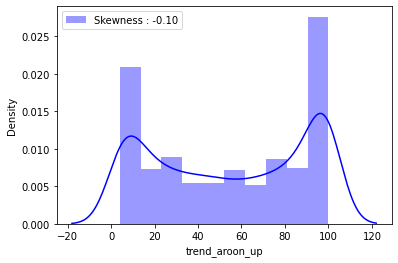

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


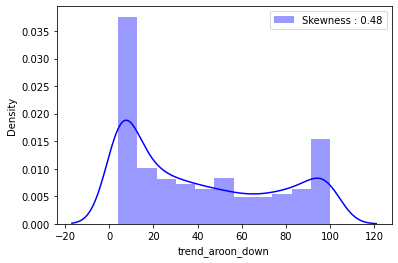

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


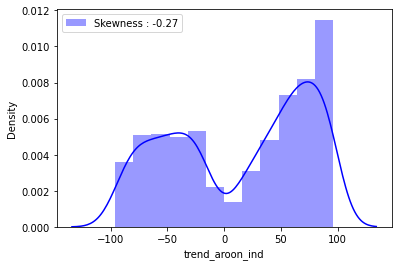

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


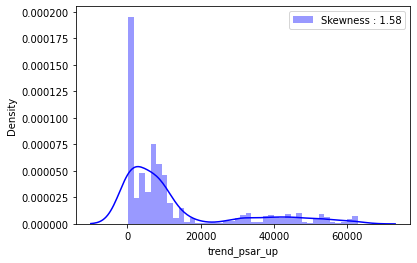

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


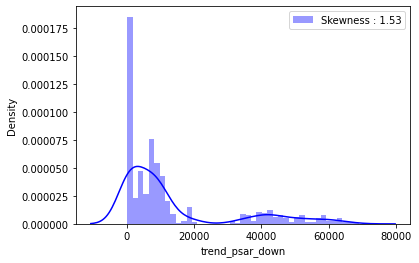

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


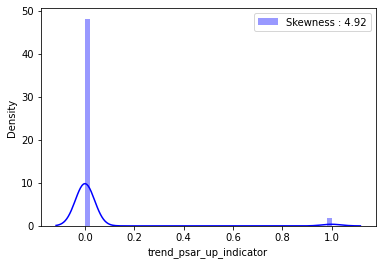

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


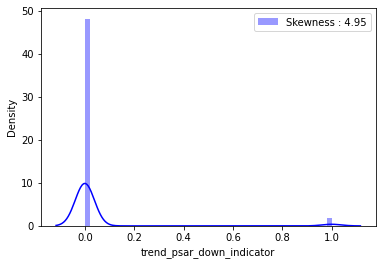

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


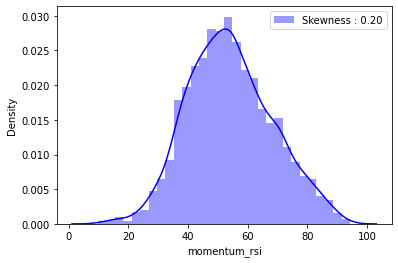

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


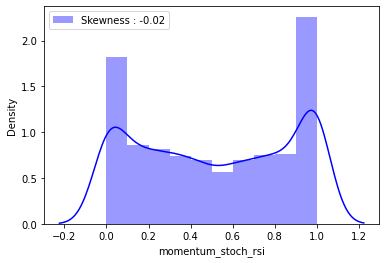

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


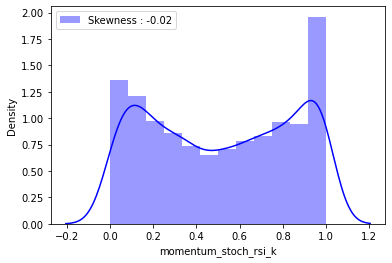

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


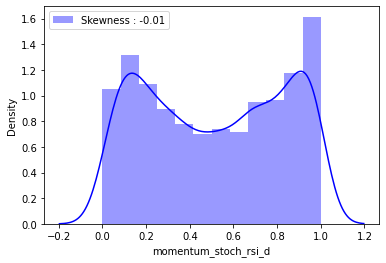

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


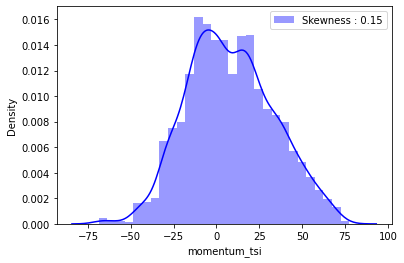

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


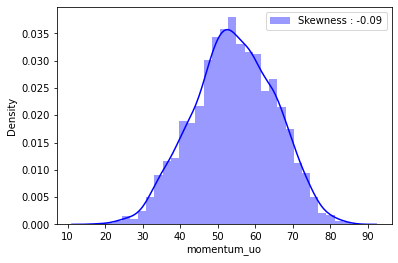

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


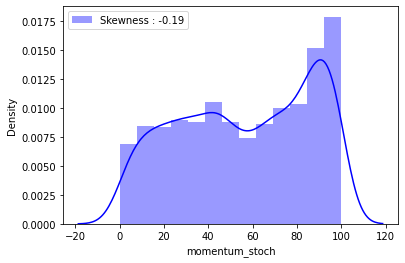

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


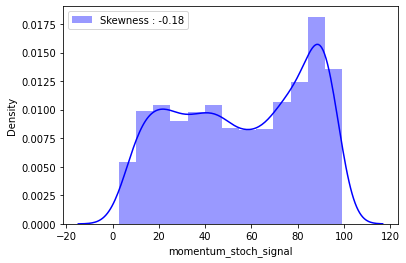

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


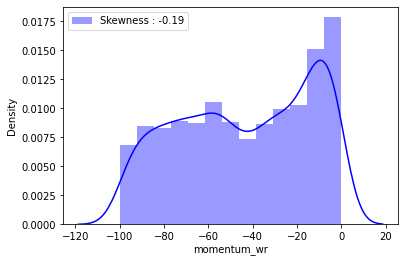

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


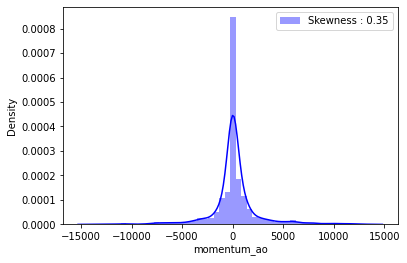

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


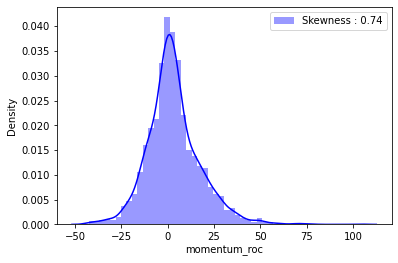

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


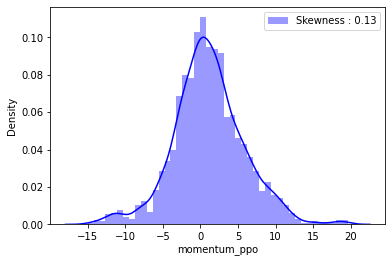

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


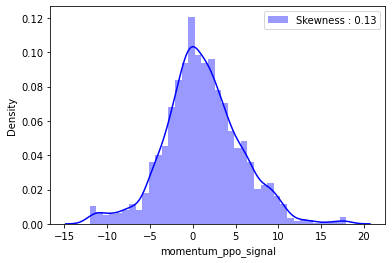

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


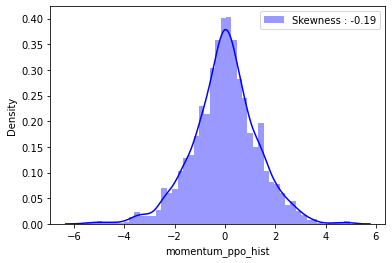

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


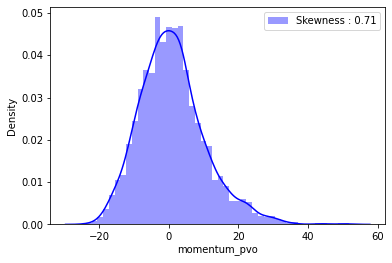

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


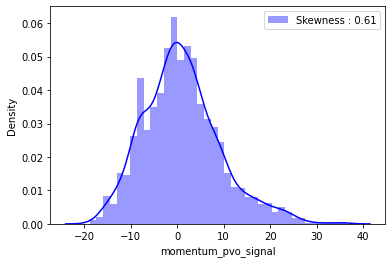

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


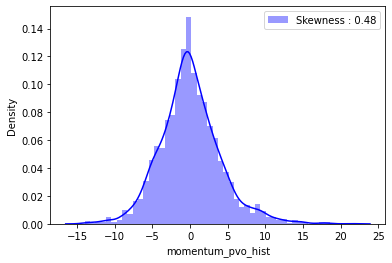

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


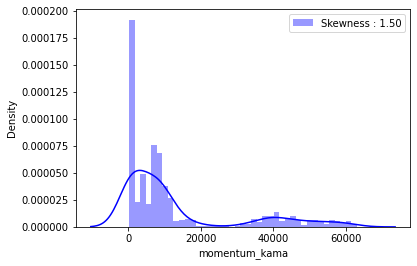

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


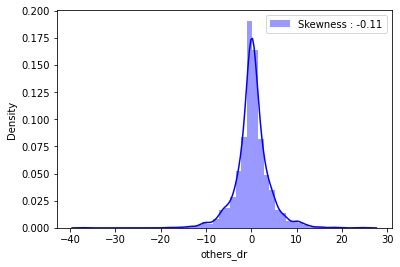

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


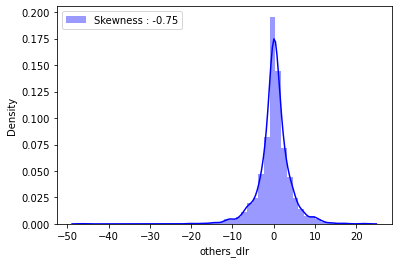

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


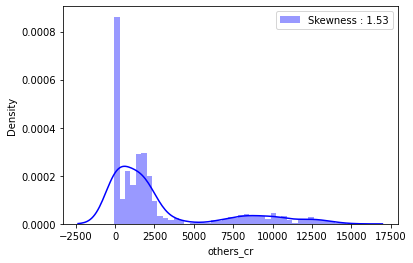

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


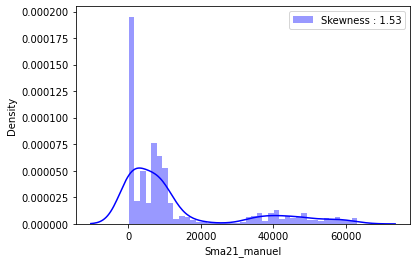

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


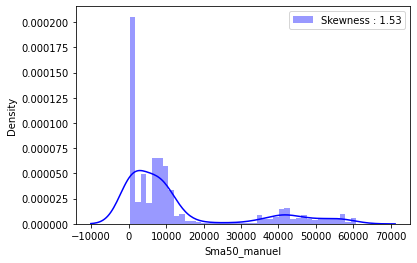

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


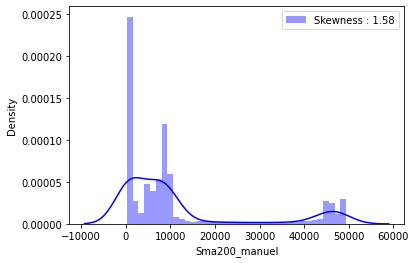

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


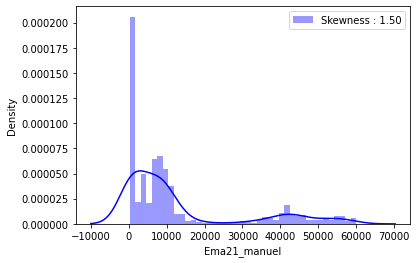

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


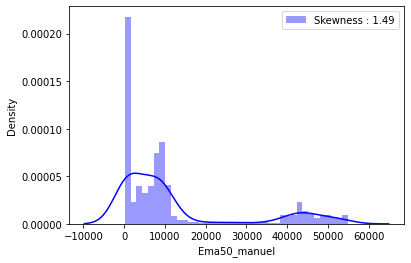

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


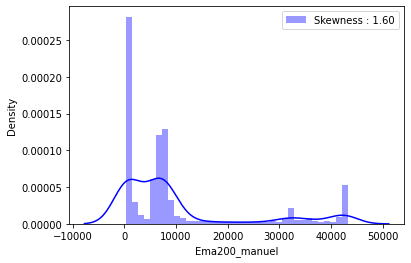

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


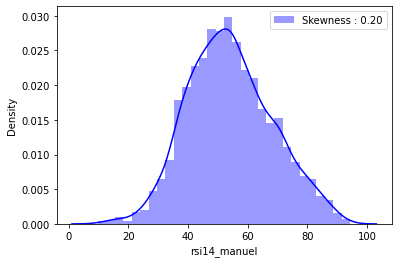

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


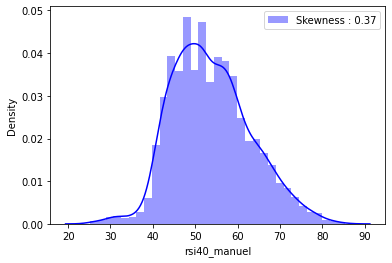

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


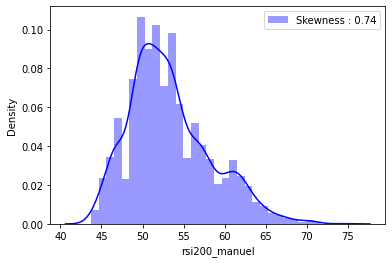

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


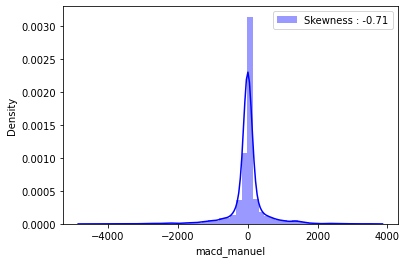

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


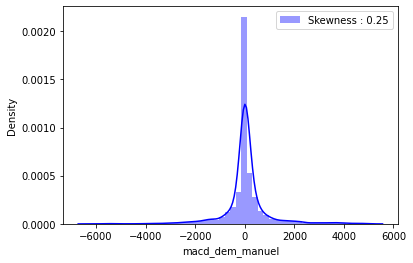

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


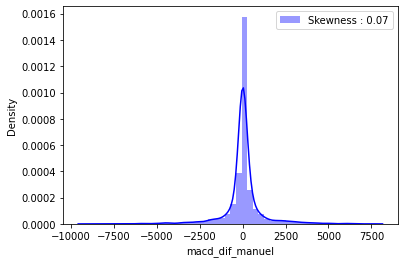

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


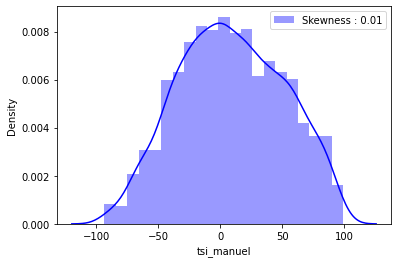

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


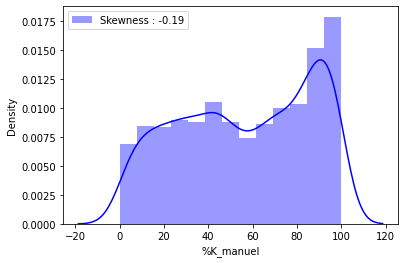

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


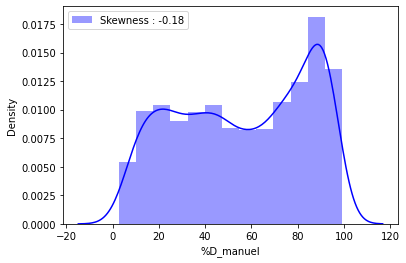

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt
for i in df.drop(columns=["Close"]):
    g = sns.distplot(df.drop(columns=["Close"])[i], color = "b", label = "Skewness : %.2f"%(df.drop(columns=["Close"])[i].skew()))
    g= g.legend(loc="best")
    plt.show()

In [109]:
def color_red(val):
    if val >0.9 and val < 0.99:
        color = "red"
    else:
        color = "black"
    return f"color: {color}"

pd.DataFrame(df.drop(columns=["Close"])).corr().style.applymap(color_red)

In [110]:
corr = df.corr()
corr.style.background_gradient(cmap="coolwarm")

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\formats\style.py:3554: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\formats\style.py:3555: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


In [ ]:
# Log-Regression
# Pipeline - Grid